In [3]:
# inspect dataset

In [2]:
!pip install geopandas
!pip install shapely

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.validation import make_valid
import numpy as np
import matplotlib.pyplot as plt

### Inspecting Allegheny County census tract file for future validation purposes. 

Data taken from WPRDC should show all Census Tracts in year 2016. Result: there should be 402 rows in our final data set. 

In [175]:
alCoCTs = pd.read_csv('AlleghenyCountyCensusTracts2016.csv')
AlCo = gpd.read_file('alcogisallegheny-county-census-tracts-2016.geojson')
AlCo['Geo_FIPS'] = AlCo['GEOID'].astype(int)
print('Number of Census Tracts: ', len(alCoCTs))
alCoCTs.sort_values('geoid')

Number of Census Tracts:  402


,_id,fid,state_fp,county_fp,tract_ce,affgeoid,geoid,name,lsad,a_land,a_water,shape_length,shape_area
69,15019,70,42,3,10300,1400000US42003010300,42003010300,103.0,CT,866087,235982,0.055235,0.000117
368,15318,369,42,3,20100,1400000US42003020100,42003020100,201.0,CT,1678102,483177,0.083161,0.000231
28,14978,29,42,3,20300,1400000US42003020300,42003020300,203.0,CT,1594790,326537,0.077032,0.000204
70,15020,71,42,3,30500,1400000US42003030500,42003030500,305.0,CT,668309,0,0.046956,0.000072
394,15344,395,42,3,40200,1400000US42003040200,42003040200,402.0,CT,604717,0,0.049916,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,15162,213,42,3,981000,1400000US42003981000,42003981000,9810.0,CT,1372534,0,0.063284,0.000147
80,15030,81,42,3,981100,1400000US42003981100,42003981100,9811.0,CT,875989,0,0.043523,0.000093
68,15018,69,42,3,981200,1400000US42003981200,42003981200,9812.0,CT,460275,156913,0.037880,0.000067
165,15115,166,42,3,981800,1400000US42003981800,42003981800,9818.0,CT,1822889,310071,0.066922,0.000228


In [177]:
placesData = pd.read_csv('PLACES__Census_Tract_Data__GIS_Friendly_Format___2020_release_20250417.csv')
placesData = placesData[placesData['CountyName']=='Allegheny']

cities2019 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release_20250405.csv")
cities2019=cities2019[cities2019['PlaceName'] == 'Pittsburgh']
places2019 = placesData[placesData['TractFIPS'].apply(lambda x: x not in cities2019['TractFIPS'].to_list())]
prevn2019 = pd.concat([cities2019, places2019])
prevn2019['Year'] = ['2019']*len(prevn2019)

cities2018 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release_20250416.csv")
cities2018=cities2018[cities2018['PlaceName'] == 'Pittsburgh']
places2018= placesData[placesData['TractFIPS'].apply(lambda x: x not in cities2018['TractFIPS'].to_list())]
prevn2018 = pd.concat([cities2018, places2018])
prevn2018['Year'] = ['2018']*len(prevn2018)

cities2017 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2017_release_20250416.csv")
cities2017=cities2017[cities2017['PlaceName'] == 'Pittsburgh']
places2017= placesData[placesData['TractFIPS'].apply(lambda x: x not in cities2017['TractFIPS'].to_list())]
prevn2017 = pd.concat([cities2017, places2017])
prevn2017['Year'] = ['2017']*len(prevn2017)

cities2016 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2016_release_20250416.csv")
cities2016=cities2016[cities2016['PlaceName'] == 'Pittsburgh']
places2016= placesData[placesData['TractFIPS'].apply(lambda x: x not in cities2016['TractFIPS'].to_list())]
prevn2016 = pd.concat([cities2016, places2016])
prevn2016['Year'] = ['2016']*len(prevn2016)

cond_prevn = pd.concat([prevn2019, prevn2018, prevn2017, prevn2016])
cond_prevn

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,TEETHLOST_Crude95CI,Geolocation,StateDesc,CountyName,CountyFIPS,TotalPopulation,CERVICAL_CrudePrev,CERVICAL_Crude95CI,Year,population_count
450,PA,Pittsburgh,4261000.0,42003010300,4261000-42003010300,6600.0,12.9,"(10.2, 16.9)",11.5,"(10.9, 12.3)",...,"(19.1, 30.4)","(40.43572601140, -79.9851241394)",NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
451,PA,Pittsburgh,4261000.0,42003020100,4261000-42003020100,3629.0,6.7,"( 5.5, 8.5)",17.7,"(17.0, 18.4)",...,"( 8.4, 13.8)","(40.44068353060, -80.0000351595)",NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
452,PA,Pittsburgh,4261000.0,42003020300,4261000-42003020300,616.0,4.8,"( 4.1, 5.8)",16.8,"(16.2, 17.5)",...,"( 4.0, 7.5)","(40.45425423370, -79.9814998549)",NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
453,PA,Pittsburgh,4261000.0,42003030500,4261000-42003030500,2256.0,14.4,"(11.9, 17.2)",35.6,"(34.1, 37.0)",...,"(21.5, 39.5)","(40.44273346300, -79.9837719110)",NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
454,PA,Pittsburgh,4261000.0,42003040200,4261000-42003040200,2604.0,11.8,"( 8.8, 15.8)",16.5,"(15.7, 17.4)",...,"(19.6, 36.3)","(40.44011022030, -79.9663476233)",NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55202,PA,NaN,NaN,42003564000,NaN,NaN,8.3,"( 7.5, 9.1)",26.5,"(25.9, 27.2)",...,"( 9.2, 13.2)",POINT (-80.2402315 40.41285776),Pennsylvania,Allegheny,42003.0,5469.0,86.9,"(86.0, 87.9)",2016,NaN
55203,PA,NaN,NaN,42003564100,NaN,NaN,4.3,"( 3.6, 5.2)",27.9,"(26.8, 29.1)",...,"( 3.4, 7.2)",POINT (-80.08698899 40.42759244),Pennsylvania,Allegheny,42003.0,882.0,89.8,"(88.4, 91.0)",2016,NaN
55204,PA,NaN,NaN,42003564200,NaN,NaN,7.6,"( 6.5, 8.8)",31.7,"(30.6, 32.8)",...,"( 7.9, 14.6)",POINT (-79.79426581 40.33230116),Pennsylvania,Allegheny,42003.0,2224.0,86.1,"(84.0, 87.9)",2016,NaN
55205,PA,NaN,NaN,42003564400,NaN,NaN,8.7,"( 7.2, 10.3)",31.1,"(30.0, 32.0)",...,"( 9.1, 17.6)",POINT (-79.79127061 40.37623919),Pennsylvania,Allegheny,42003.0,5620.0,85.2,"(83.1, 87.2)",2016,NaN


In [178]:
cond_prevn.isna().sum()

StateAbbr                    0
PlaceName                 1060
PlaceFIPS                 1060
TractFIPS                    0
Place_TractID             1060
Population2010            1187
ACCESS2_CrudePrev            0
ACCESS2_Crude95CI            0
ARTHRITIS_CrudePrev          0
ARTHRITIS_Crude95CI          0
BINGE_CrudePrev              0
BINGE_Crude95CI              0
BPHIGH_CrudePrev             0
BPHIGH_Crude95CI             0
BPMED_CrudePrev              0
BPMED_Crude95CI              0
CANCER_CrudePrev             0
CANCER_Crude95CI             0
CASTHMA_CrudePrev            0
CASTHMA_Crude95CI            0
CHD_CrudePrev                0
CHD_Crude95CI                0
CHECKUP_CrudePrev            0
CHECKUP_Crude95CI            0
CHOLSCREEN_CrudePrev         0
CHOLSCREEN_Crude95CI         0
COLON_SCREEN_CrudePrev       0
COLON_SCREEN_Crude95CI       0
COPD_CrudePrev               0
COPD_Crude95CI               0
COREM_CrudePrev              0
COREM_Crude95CI              0
COREW_Cr

In [179]:
cond_prevn = cond_prevn.dropna(axis='columns')
cond_prevn.isna().sum()

StateAbbr                 0
TractFIPS                 0
ACCESS2_CrudePrev         0
ACCESS2_Crude95CI         0
ARTHRITIS_CrudePrev       0
ARTHRITIS_Crude95CI       0
BINGE_CrudePrev           0
BINGE_Crude95CI           0
BPHIGH_CrudePrev          0
BPHIGH_Crude95CI          0
BPMED_CrudePrev           0
BPMED_Crude95CI           0
CANCER_CrudePrev          0
CANCER_Crude95CI          0
CASTHMA_CrudePrev         0
CASTHMA_Crude95CI         0
CHD_CrudePrev             0
CHD_Crude95CI             0
CHECKUP_CrudePrev         0
CHECKUP_Crude95CI         0
CHOLSCREEN_CrudePrev      0
CHOLSCREEN_Crude95CI      0
COLON_SCREEN_CrudePrev    0
COLON_SCREEN_Crude95CI    0
COPD_CrudePrev            0
COPD_Crude95CI            0
COREM_CrudePrev           0
COREM_Crude95CI           0
CSMOKING_CrudePrev        0
CSMOKING_Crude95CI        0
DENTAL_CrudePrev          0
DENTAL_Crude95CI          0
DIABETES_CrudePrev        0
DIABETES_Crude95CI        0
HIGHCHOL_CrudePrev        0
HIGHCHOL_Crude95CI  

In [183]:
cond_prevn = cond_prevn.rename(columns={'TractFIPS': 'Geo_FIPS'})
#Removing unrelated prevalence columns (not comorbidities with Asthma)
def drop_columns_with_keyword(df, keyword):
    # Identify columns containing the keyword (95CI)
    cols_to_drop = [col for col in df.columns if keyword.lower() in col.lower()]
    # Drop them and return the updated DataFrame
    return df.drop(columns=cols_to_drop)
cond_prevn = drop_columns_with_keyword(cond_prevn,'95CI')
cond_prevn = cond_prevn.drop([
    'ARTHRITIS_CrudePrev',
    'BINGE_CrudePrev',
    'CANCER_CrudePrev',
    'COLON_SCREEN_CrudePrev',
    'DENTAL_CrudePrev',
    'KIDNEY_CrudePrev',
    'LPA_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev',
    'SLEEP_CrudePrev',
    'STROKE_CrudePrev',
    'TEETHLOST_CrudePrev'], axis=1)
cond_prevn['lat'] = cond_prevn['Geolocation'].str[1:15]
cond_prevn['lon'] = cond_prevn['Geolocation'].str[-15:-1]
cond_prevn

,StateAbbr,Geo_FIPS,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year,lat,lon
450,PA,42003010300,12.9,19.0,51.9,11.1,2.6,63.7,58.1,4.4,38.8,26.5,5.0,17.6,29.8,"(40.43572601140, -79.9851241394)",2019,40.43572601140,-79.9851241394
451,PA,42003020100,6.7,22.1,71.8,9.3,3.9,68.4,73.4,3.8,50.2,14.4,6.4,24.9,23.4,"(40.44068353060, -80.0000351595)",2019,40.44068353060,-80.0000351595
452,PA,42003020300,4.8,19.7,67.6,8.2,2.8,67.4,80.4,2.8,54.3,12.3,4.9,24.2,23.4,"(40.45425423370, -79.9814998549)",2019,40.45425423370,-79.9814998549
453,PA,42003030500,14.4,48.3,84.3,12.8,9.9,79.2,79.7,10.6,32.5,26.9,20.5,37.2,42.6,"(40.44273346300, -79.9837719110)",2019,40.44273346300,-79.9837719110
454,PA,42003040200,11.8,23.3,67.1,11.7,4.0,67.5,61.4,5.5,31.8,22.3,8.0,22.3,29.3,"(40.44011022030, -79.9663476233)",2019,40.44011022030,-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55202,PA,42003564000,8.3,28.1,74.5,9.9,5.6,77.1,85.8,6.4,43.9,19.7,8.4,32.3,31.9,POINT (-80.2402315 40.41285776),2016,OINT (-80.2402,15 40.41285776
55203,PA,42003564100,4.3,28.8,79.0,8.7,5.4,81.1,91.1,4.7,50.8,10.8,8.0,34.8,28.1,POINT (-80.08698899 40.42759244),2016,OINT (-80.0869,99 40.42759244
55204,PA,42003564200,7.6,33.4,79.7,9.6,7.2,80.0,88.0,7.4,43.7,18.1,10.3,36.6,31.5,POINT (-79.79426581 40.33230116),2016,OINT (-79.7942,81 40.33230116
55205,PA,42003564400,8.7,32.8,78.5,10.1,7.2,79.3,86.8,7.7,42.5,20.1,10.4,35.5,32.7,POINT (-79.79127061 40.37623919),2016,OINT (-79.7912,61 40.37623919


<Axes: >

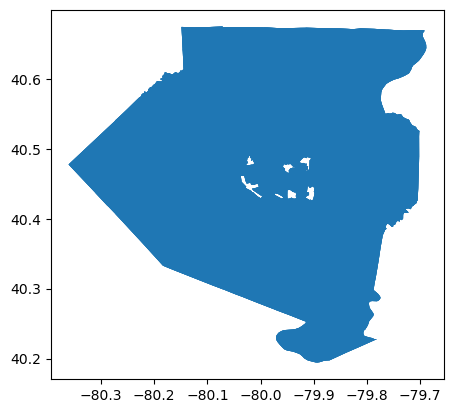

In [200]:
testMerge = AlCo.merge(cond_prevn, how='inner', left_on='Geo_FIPS', right_on='Geo_FIPS', validate='one_to_many')
testMerge.plot()

In [218]:
prevelence_data = cond_prevn
print(prevelence_data.isna().sum())
print(len(prevelence_data)/4)
prevelence_data

StateAbbr               0
Geo_FIPS                0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         0
CSMOKING_CrudePrev      0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
OBESITY_CrudePrev       0
Geolocation             0
Year                    0
lat                     0
lon                     0
dtype: int64
392.0


,StateAbbr,Geo_FIPS,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year,lat,lon
450,PA,42003010300,12.9,19.0,51.9,11.1,2.6,63.7,58.1,4.4,38.8,26.5,5.0,17.6,29.8,"(40.43572601140, -79.9851241394)",2019,40.43572601140,-79.9851241394
451,PA,42003020100,6.7,22.1,71.8,9.3,3.9,68.4,73.4,3.8,50.2,14.4,6.4,24.9,23.4,"(40.44068353060, -80.0000351595)",2019,40.44068353060,-80.0000351595
452,PA,42003020300,4.8,19.7,67.6,8.2,2.8,67.4,80.4,2.8,54.3,12.3,4.9,24.2,23.4,"(40.45425423370, -79.9814998549)",2019,40.45425423370,-79.9814998549
453,PA,42003030500,14.4,48.3,84.3,12.8,9.9,79.2,79.7,10.6,32.5,26.9,20.5,37.2,42.6,"(40.44273346300, -79.9837719110)",2019,40.44273346300,-79.9837719110
454,PA,42003040200,11.8,23.3,67.1,11.7,4.0,67.5,61.4,5.5,31.8,22.3,8.0,22.3,29.3,"(40.44011022030, -79.9663476233)",2019,40.44011022030,-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55202,PA,42003564000,8.3,28.1,74.5,9.9,5.6,77.1,85.8,6.4,43.9,19.7,8.4,32.3,31.9,POINT (-80.2402315 40.41285776),2016,OINT (-80.2402,15 40.41285776
55203,PA,42003564100,4.3,28.8,79.0,8.7,5.4,81.1,91.1,4.7,50.8,10.8,8.0,34.8,28.1,POINT (-80.08698899 40.42759244),2016,OINT (-80.0869,99 40.42759244
55204,PA,42003564200,7.6,33.4,79.7,9.6,7.2,80.0,88.0,7.4,43.7,18.1,10.3,36.6,31.5,POINT (-79.79426581 40.33230116),2016,OINT (-79.7942,81 40.33230116
55205,PA,42003564400,8.7,32.8,78.5,10.1,7.2,79.3,86.8,7.7,42.5,20.1,10.4,35.5,32.7,POINT (-79.79127061 40.37623919),2016,OINT (-79.7912,61 40.37623919


In [220]:
testMerge.dropna().shape

(1568, 32)

### Utlization Data

Kinda did some sketchy stuff to join this. Pretty much summing treats NAs as 0. Missing 6 Census Tracts for some reason.

In [223]:
ER_use = pd.read_csv("Allegheny_county_ER_use.csv")
ER_use.head()

,_id,Geo_FIPS,StateFIPS,CountyFIPS,TractFIPS,BlockgroupFIPS,TotalPopEst2015_19ACS,YearOfStartDate,UnderAge1PopEst2015_19ACS,Age0to17PopEst2015_19ACS,...,ED_VisitsPer100Age0to17,NumberLowAcuityED_VisitsAge0to17,LowAcuityED_VisitsPer100Age0to17,NumberAsthmaRelatedED_Visits,AsthmaRelatedED_VisitsPer100Age0to17,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,InjuryRelatedEDVisitsPer100Age0to17,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,AcuteRespiratoryTractInfectionRelatedED_VisitsPer100Age0to17
0,1,420031301002,42,3,130100,2,518,2016.0,9.4,207,...,58.9,62.0,30.0,40.0,19.3,14.0,1.0,0.5,18.0,8.7
1,2,420031301002,42,3,130100,2,518,2017.0,9.4,207,...,62.8,80.0,38.6,54.0,26.1,11.0,1.0,0.5,27.0,13.0
2,3,420031301002,42,3,130100,2,518,2018.0,9.4,207,...,66.7,85.0,41.1,59.0,28.5,13.0,2.0,1.0,19.0,9.2
3,4,420031301002,42,3,130100,2,518,2019.0,9.4,207,...,71.5,96.0,46.4,68.0,32.9,7.0,NaN,0.0,27.0,13.0
4,5,420031301003,42,3,130100,3,489,2016.0,0.0,134,...,53.0,39.0,29.1,13.0,9.7,12.0,2.0,1.5,10.0,7.5


In [225]:
ER_use.shape

(4370, 23)

In [227]:
PC_use = pd.read_csv("Allegheny_county_PC_use.csv")
PC_use = PC_use.fillna(0)

In [229]:
PC_use.shape

(4366, 14)

In [231]:
#merging utilization data for Asthma ER and primary care
util_data = PC_use.merge(ER_use, how = 'left', left_on = ['Geo_FIPS', 'YearOfContactDate'], right_on = ['Geo_FIPS', 'YearOfStartDate'], validate='one_to_one')
#dropping repeat columns
util_data = util_data.drop(["_id_y","StateFIPS_y","CountyFIPS_y","TractFIPS_y","BlockgroupFIPS_y",
                            "TotalPopEst2015_19ACS_y","Age0to17PopEst2015_19ACS_y"],axis="columns")
util_data

,_id_x,Geo_FIPS,StateFIPS_x,CountyFIPS_x,TractFIPS_x,BlockgroupFIPS_x,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,YearOfContactDate,AllPrimaryCarePatientsAge0to17,...,ED_VisitsPer100Age0to17,NumberLowAcuityED_VisitsAge0to17,LowAcuityED_VisitsPer100Age0to17,NumberAsthmaRelatedED_Visits,AsthmaRelatedED_VisitsPer100Age0to17,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,InjuryRelatedEDVisitsPer100Age0to17,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,AcuteRespiratoryTractInfectionRelatedED_VisitsPer100Age0to17
0,1,420031301002,42,3,130100,2,518,207,2016,82,...,58.9,62.0,30.0,40.0,19.3,14.0,1.0,0.5,18.0,8.7
1,2,420031301002,42,3,130100,2,518,207,2017,94,...,62.8,80.0,38.6,54.0,26.1,11.0,1.0,0.5,27.0,13.0
2,3,420031301002,42,3,130100,2,518,207,2018,89,...,66.7,85.0,41.1,59.0,28.5,13.0,2.0,1.0,19.0,9.2
3,4,420031301002,42,3,130100,2,518,207,2019,86,...,71.5,96.0,46.4,68.0,32.9,7.0,NaN,0.0,27.0,13.0
4,5,420031301003,42,3,130100,3,489,134,2016,53,...,53.0,39.0,29.1,13.0,9.7,12.0,2.0,1.5,10.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,4362,420039818001,42,3,981800,1,207,47,2019,4,...,17.0,2.0,4.3,NaN,0.0,NaN,NaN,0.0,NaN,0.0
4362,4363,420039822001,42,3,982200,1,4618,80,2016,16,...,12.5,2.0,2.5,NaN,0.0,1.0,NaN,0.0,NaN,0.0
4363,4364,420039822001,42,3,982200,1,4618,80,2017,18,...,12.5,2.0,2.5,1.0,1.3,1.0,NaN,0.0,3.0,3.8
4364,4365,420039822001,42,3,982200,1,4618,80,2018,19,...,11.3,2.0,2.5,NaN,0.0,2.0,NaN,0.0,3.0,3.8


In [233]:
#Joining rows based on CTs
#Dropping Per100 columns
util_data = drop_columns_with_keyword(util_data,'Per100')
util_data['Geo_FIPS'] = util_data['Geo_FIPS'].apply(str)
util_data['Geo_FIPS'] = util_data['Geo_FIPS'].str[:-1]
util_data = util_data.drop(columns=['_id_x', 'StateFIPS_x', 'CountyFIPS_x', 'TractFIPS_x', 'BlockgroupFIPS_x'])
util_data = util_data.groupby(['Geo_FIPS', 'YearOfContactDate'], as_index=False).sum()
util_data.isna().sum()

Geo_FIPS                                                        0
YearOfContactDate                                               0
TotalPopEst2015_19ACS_x                                         0
Age0to17PopEst2015_19ACS_x                                      0
AllPrimaryCarePatientsAge0to17                                  0
WellChildVisitsInPastYearAge0to17                               0
AsthmaDiagnosisAge0to17                                         0
YearOfStartDate                                                 0
UnderAge1PopEst2015_19ACS                                       0
Unique0to17WithED_Visit                                         0
NumberED_VisitsAge0to17                                         0
NumberLowAcuityED_VisitsAge0to17                                0
NumberAsthmaRelatedED_Visits                                    0
NumberED_VisitsByChildrenUnder1YearOld                          0
NumberOfInjuryRelatedVisits                                     0
NumberAcut

In [235]:
util_data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17
0,42003010300,2016,4147,155,50,33,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42003010300,2017,4147,155,41,24,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42003010300,2018,4147,155,44,34,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42003010300,2019,728,122,47,36,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42003020100,2016,5490,201,71,44,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,42003981800,2019,207,47,4,3,2.0,2019.0,0.0,4.0,8.0,2.0,0.0,0.0,0.0,0.0
1581,42003982200,2016,4618,80,16,13,1.0,2016.0,0.0,6.0,10.0,2.0,0.0,1.0,0.0,0.0
1582,42003982200,2017,4618,80,18,16,1.0,2017.0,0.0,10.0,10.0,2.0,1.0,1.0,0.0,3.0
1583,42003982200,2018,4618,80,19,14,1.0,2018.0,0.0,7.0,9.0,2.0,0.0,2.0,0.0,3.0


### Race Data

In [238]:
#loading racial data from 2010 census
Race_data = pd.read_csv("2010_census_race_P9-Data.csv", header = 1)
#removing extra details on multi-racial individuals
Race_data = Race_data.iloc[:,:13]
Race_data['Type'] = Race_data['Geographic Area Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))
Race_data = Race_data[Race_data['Type'] == 'Census Tract']
Race_data

,Geography,Geographic Area Name,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Type
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,2,12,77,Census Tract
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,1,27,88,Census Tract
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,0,0,11,Census Tract
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,0,4,45,Census Tract
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,0,1,38,Census Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",4,0,4,4,4,0,0,0,0,0,0,Census Tract
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",7,0,7,7,6,1,0,0,0,0,0,Census Tract
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,0,0,0,0,0,0,0,0,0,0,Census Tract
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",461,14,447,436,257,174,3,2,0,0,11,Census Tract


In [240]:
Race_data.shape

(402, 14)

### House Hold Income Data

In [243]:
#loading 5 year HH income data adj to 2016 inflation levels
HHincome_data = pd.read_csv("2016_ad_HHincome.S2503-Data.csv", na_values = ['-'])
#removed data on Housing cost as % of hh income
#HHincome_data = HHincome_data.iloc[:,:-133]
HHincome_data['Type'] = HHincome_data['Geographic Area Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))
HHincome_data = HHincome_data[HHincome_data['Type'] == 'Census Tract']
HHincome_data

,Geography,Geographic Area Name,Occupied housing units!!Estimate!!Occupied housing units,Occupied housing units!!Margin of Error!!Occupied housing units,Owner-occupied housing units!!Estimate!!Occupied housing units,Owner-occupied housing units!!Margin of Error!!Occupied housing units,Renter-occupied housing units!!Estimate!!Occupied housing units,Renter-occupied housing units!!Margin of Error!!Occupied housing units,"Occupied housing units!!Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","Occupied housing units!!Margin of Error!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000",...,Owner-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Renter-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Renter-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Owner-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Owner-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Renter-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Renter-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Type
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",281,38,73,31,208,44,4.6,5.1,...,26,2.9,4.3,0.0,7.7,(X),(X),0.0,10.2,Census Tract
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",2042,160,408,116,1634,154,4.8,2.5,...,5.4,2.6,2.1,0.0,1.1,(X),(X),0.0,1.4,Census Tract
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",553,48,86,37,467,57,2.7,3,...,22.7,3.2,3.5,0.0,4,(X),(X),0.0,4.7,Census Tract
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",1117,96,211,51,906,116,8.3,6.1,...,10.1,3.6,4.4,0.0,2,(X),(X),0.0,2.4,Census Tract
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",611,61,182,51,429,69,18.7,8.6,...,11.6,16.6,10,1.5,1.6,(X),(X),2.1,2.2,Census Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",0,10,0,10,0,10,NaN,**,...,**,NaN,**,NaN,**,(X),(X),NaN,**,Census Tract
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",5,7,0,10,5,7,0.0,100,...,**,0.0,100,0.0,100,(X),(X),0.0,100,Census Tract
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,10,0,10,0,10,NaN,**,...,**,NaN,**,NaN,**,(X),(X),NaN,**,Census Tract
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",17,10,5,7,12,11,0.0,59.8,...,100,0.0,71.2,0.0,59.8,(X),(X),0.0,71.2,Census Tract


In [245]:
HHincome_data = drop_columns_with_keyword(HHincome_data,'Margin of Error')
HHincome_data = drop_columns_with_keyword(HHincome_data,'Owner-occupied')
HHincome_data = drop_columns_with_keyword(HHincome_data,'Renter-occupied')
HHincome_data = HHincome_data.iloc[:,:15]
colsDict = {}
for col in HHincome_data.columns[3:]:
    colsDict[col] = '!!'.join(col.split('!!')[2:4])
HHincome_data = HHincome_data.rename(columns=colsDict)
HHincome_data

,Geography,Geographic Area Name,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",281,4.6,15.3,2.8,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",2042,4.8,7.3,4.2,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",553,2.7,0.0,2.5,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",1117,8.3,15.0,15.0,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",611,18.7,22.3,6.2,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",17,0.0,23.5,0.0,52.9,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0


In [247]:
#Merging census datasets
census_data = Race_data.merge(HHincome_data, how = 'left', left_on = 'Geography', right_on = 'Geography')
#census_data = census_data.drop(index=0)
census_data['Geo_FIPS'] = census_data['Geography'].str[-11:]
#col = census_data.pop('Geo_FIPS')
#census_data.insert(0, 'Geo_FIPS', col)
census_data2016 = census_data.copy()
census_data2016['Year'] = [2016]*len(census_data2016)
census_data2017 = census_data.copy()
census_data2017['Year'] = [2017]*len(census_data2017)
census_data2018 = census_data.copy()
census_data2018['Year'] = [2018]*len(census_data2018)
census_data2019 = census_data.copy()
census_data2019['Year'] = [2019]*len(census_data2019)
census_data=pd.concat([census_data2016, census_data2017, census_data2018, census_data2019], axis =0)
census_data

,Geography,Geographic Area Name_x,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,...,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Geo_FIPS,Year
0,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,...,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0,42003010300,2016
1,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,...,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0,42003020100,2016
2,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,...,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0,42003020300,2016
3,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,...,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0,42003030500,2016
4,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,...,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0,42003040200,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",4,0,4,4,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003981000,2019
398,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",7,0,7,7,6,1,0,0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN,42003981100,2019
399,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003981200,2019
400,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",461,14,447,436,257,174,3,2,...,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0,42003981800,2019


In [249]:
census_data.isna().sum()

Geography                                                                                                          0
Geographic Area Name_x                                                                                             0
Total                                                                                                              0
Total!!Hispanic or Latino                                                                                          0
Total!!Not Hispanic or Latino                                                                                      0
Total!!Not Hispanic or Latino!!Population of one race                                                              0
Total!!Not Hispanic or Latino!!Population of one race!!White alone                                                 0
Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone                             0
Total!!Not Hispanic or Latino!!Population of one race!!American 

In [251]:
#Loading Emissions data
emissions_data = pd.read_csv("Emissions_Data_w_Census_Tracts_Pivot.csv")
# Retaining data from 2016-2019 to align with utilization data
#emissions_data = emissions_data[(emissions_data["year"] <= 2019) & (emissions_data["year"] >= 2016)]

emissions_data = alCoCTs[['geoid', 'tract_ce']].merge(emissions_data, how = 'left', left_on='tract_ce', right_on='TractCE', validate='one_to_many')
emissions_data=emissions_data.fillna(0)

In [253]:
alCoCTs['geoid'].unique

<bound method Series.unique of 0      42003050900
1      42003070300
2      42003120700
3      42003140400
4      42003180700
          ...     
397    42003141000
398    42003202300
399    42003320600
400    42003408001
401    42003414101
Name: geoid, Length: 402, dtype: int64>

## Final Merges

In [256]:
#Merging health care utlization data with census data on race and household income
utilxcensus_data = util_data.merge(census_data, how='right', left_on=['Geo_FIPS','YearOfContactDate'], right_on=['Geo_FIPS','Year'])
utilxcensus_data['Geo_FIPS']=utilxcensus_data['Geo_FIPS'].apply(int)
utilxcensus_data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Year
0,42003010300,2016.0,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0,2016
1,42003020100,2016.0,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0,2016
2,42003020300,2016.0,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0,2016
3,42003030500,2016.0,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0,2016
4,42003040200,2016.0,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,42003981000,2019.0,0.0,0.0,12.0,7.0,3.0,2019.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1604,42003981100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN,2019
1605,42003981200,2019.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1606,42003981800,2019.0,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,52.9,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0,2019


In [258]:
#merged census and utilization data with health condition prevalence data
utilxcensus_data = utilxcensus_data.dropna(subset=['YearOfContactDate'])
utilxcensus_data['YearOfContactDate'] = utilxcensus_data['YearOfContactDate'].astype(int)
prevelence_data['Year']= prevelence_data['Year'].astype(int)
semi_data = utilxcensus_data.merge(prevelence_data, how='left', left_on=['Geo_FIPS', 'YearOfContactDate'], right_on=['Geo_FIPS','Year'])
#semi_data['TRACTCE'] = semi_data['TractFIPS_x']
semi_data

/var/folders/8k/plh_p7b14qjbl9l1lkyy1qbc0000gr/T/ipykernel_96341/3852005379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utilxcensus_data['YearOfContactDate'] = utilxcensus_data['YearOfContactDate'].astype(int)


,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year_y,lat,lon
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,4.1,28.9,28.0,4.8,18.6,28.9,"(40.4357260114, -79.9851241394)",2016.0,"40.4357260114,",-79.9851241394
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,4.5,35.2,19.0,7.3,28.6,25.2,"(40.4406835306, -80.0000351595)",2016.0,"40.4406835306,",-80.0000351595
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,2.8,38.3,13.2,5.3,27.3,24.1,"(40.4542542337, -79.9814998549)",2016.0,"40.4542542337,",-79.9814998549
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,11.3,23.0,29.0,22.3,38.8,45.4,"(40.442733463, -79.983771911)",2016.0,"40.442733463,",-79.983771911
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,5.8,23.5,25.9,8.2,24.9,29.7,"(40.4401102203, -79.9663476233)",2016.0,"40.4401102203,",-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,42003980500,2019,16.0,0.0,4.0,3.0,1.0,2019.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,42003981000,2019,0.0,0.0,12.0,7.0,3.0,2019.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1582,42003981200,2019,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,10.6,34.8,16.3,17.4,39.9,29.0,"(40.48038259110, -79.8972205116)",2019.0,40.48038259110,-79.8972205116


In [393]:
#joining emissions dataset
data = semi_data.merge(emissions_data, how='left', left_on=['Geo_FIPS', 'YearOfContactDate'], right_on=['geoid','Year'])
#dropping duplicate columns
#data = data.drop(['TARGET_FID','STATEFP','COUNTYFP','TRACTCE','AFFGEOID','GEOID','NAME'],axis=1)
data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.0,0.03,0.0,0.0,1.91,0.01,68.8900
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,0.0,0.18,0.0,0.0,0.00,0.0,0.0,1.65,0.00,36410.4401
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,0.0,0.58,0.0,0.0,0.08,0.0,0.0,8.13,0.01,73625.8502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,42003980500,2019,16.0,0.0,4.0,3.0,1.0,2019.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,42003981000,2019,0.0,0.0,12.0,7.0,3.0,2019.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1582,42003981200,2019,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [395]:
pd.set_option('display.max_rows', 150)
data.isna().sum()

Geo_FIPS                                                                                                             0
YearOfContactDate                                                                                                    0
TotalPopEst2015_19ACS_x                                                                                              0
Age0to17PopEst2015_19ACS_x                                                                                           0
AllPrimaryCarePatientsAge0to17                                                                                       0
WellChildVisitsInPastYearAge0to17                                                                                    0
AsthmaDiagnosisAge0to17                                                                                              0
YearOfStartDate                                                                                                      0
UnderAge1PopEst2015_19ACS                       

<Axes: >

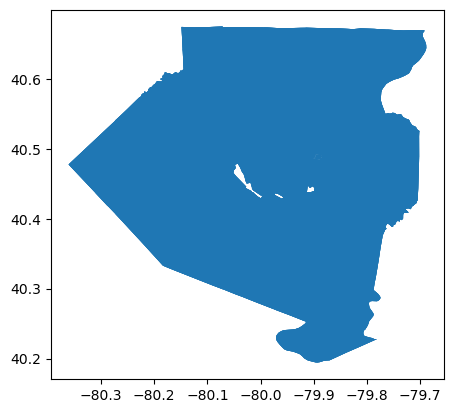

In [379]:
geoData = AlCo.merge(data, how='inner', on='Geo_FIPS', validate='one_to_many')
geoData.plot()

In [381]:
data[data['CASTHMA_CrudePrev'].isna()]

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
388,42003980100,2016,0.0,0.0,4.0,3.0,1.0,2016.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,42003980300,2016,0.0,0.0,3.0,2.0,0.0,2016.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,42003980400,2016,0.0,0.0,5.0,4.0,0.0,2016.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,42003980500,2016,16.0,0.0,4.0,3.0,1.0,2016.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,42003981000,2016,0.0,0.0,12.0,10.0,3.0,2016.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,42003981200,2016,0.0,0.0,2.0,2.0,0.0,2016.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,42003980100,2017,0.0,0.0,4.0,4.0,1.0,2017.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,42003980300,2017,0.0,0.0,4.0,5.0,0.0,2017.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,42003980400,2017,0.0,0.0,5.0,3.0,0.0,2017.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,42003980500,2017,16.0,0.0,4.0,2.0,1.0,2017.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

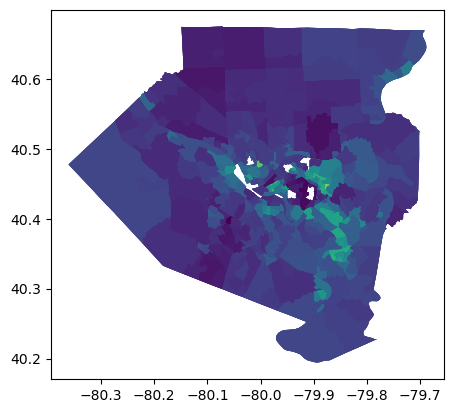

In [383]:
geoData.plot(column='CASTHMA_CrudePrev')

In [385]:
data[data['HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000'].isna()]

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
389,42003980300,2016,0.0,0.0,3.0,2.0,0.0,2016.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,42003980400,2016,0.0,0.0,5.0,4.0,0.0,2016.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,42003981000,2016,0.0,0.0,12.0,10.0,3.0,2016.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,42003981200,2016,0.0,0.0,2.0,2.0,0.0,2016.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,42003980300,2017,0.0,0.0,4.0,5.0,0.0,2017.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,42003980400,2017,0.0,0.0,5.0,3.0,0.0,2017.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,42003981000,2017,0.0,0.0,12.0,5.0,3.0,2017.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,42003981200,2017,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,42003980300,2018,0.0,0.0,4.0,5.0,0.0,2018.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183,42003980400,2018,0.0,0.0,6.0,4.0,0.0,2018.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
data = data.dropna(subset=['CASTHMA_CrudePrev'])
data = data.fillna(0)
data['High_Prev'] = pd.qcut(data['CASTHMA_CrudePrev'], q=4, labels=[1,2,3,4])
data['High_Prev'] = data['High_Prev'].astype(int)
data['CASTHMA_CrudePrev'].describe()

count    1561.000000
mean       10.289622
std         1.540923
min         7.800000
25%         9.200000
50%         9.800000
75%        10.900000
max        17.900000
Name: CASTHMA_CrudePrev, dtype: float64

In [453]:
AlCo2016=AlCo.merge(data[data['YearOfContactDate']==2016], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCo2017=AlCo.merge(data[data['YearOfContactDate']==2017], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCo2018=AlCo.merge(data[data['YearOfContactDate']==2018], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCo2019=AlCo.merge(data[data['YearOfContactDate']==2019], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCoFull = pd.concat([AlCo2016, AlCo2017, AlCo2018, AlCo2019])
AlCoFull

,FID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total,High_Prev,AsthmaDiagnosis%,High_Diagnosis,TractNum
0,1,42,003,050900,1400000US42003050900,42003050900,509,CT,452643.0,4114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.162242,4,429201.0
1,2,42,003,070300,1400000US42003070300,42003070300,703,CT,428546.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.121795,4,478100.0
2,3,42,003,120700,1400000US42003120700,42003120700,1207,CT,514927.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.030717,1,417200.0
3,4,42,003,140400,1400000US42003140400,42003140400,1404,CT,834995.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.103239,4,472200.0
4,5,42,003,180700,1400000US42003180700,42003180700,1807,CT,393380.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0.060932,2,980400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,398,42,003,141000,1400000US42003141000,42003141000,1410,CT,507878.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.041860,1,NaN
386,399,42,003,202300,1400000US42003202300,42003202300,2023,CT,2532255.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.088028,3,NaN
387,400,42,003,320600,1400000US42003320600,42003320600,3206,CT,1479651.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.067935,2,NaN
388,401,42,003,408001,1400000US42003408001,42003408001,4080.01,CT,26224976.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.139013,4,NaN


<Axes: >

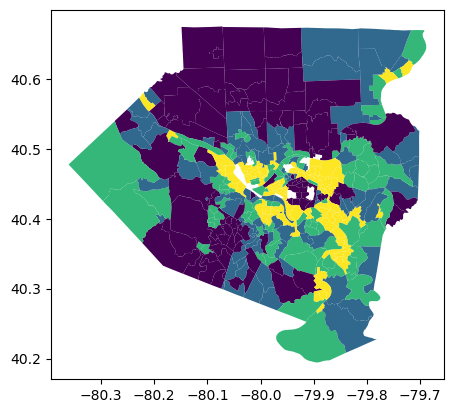

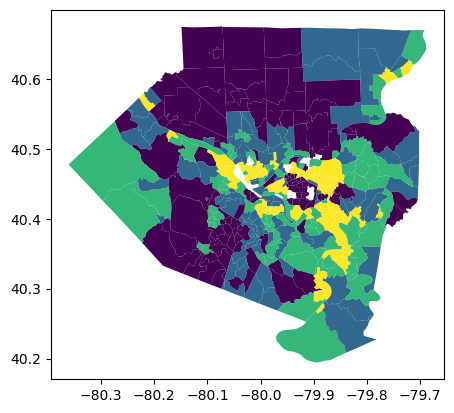

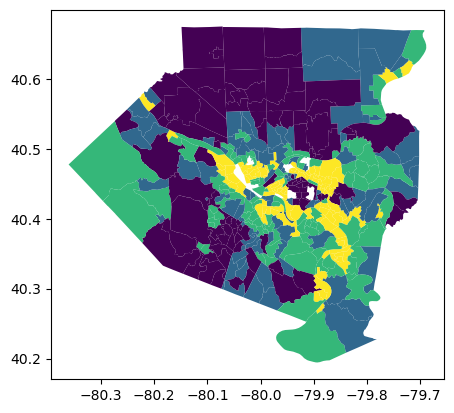

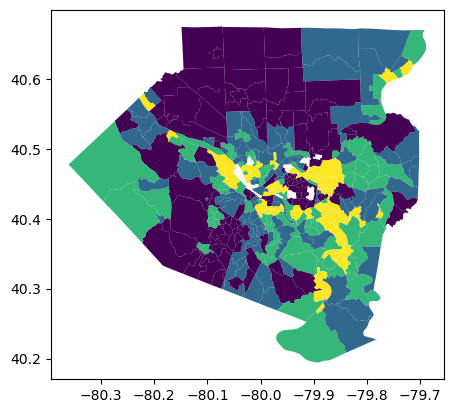

In [401]:
AlCo2016.plot(column='High_Prev')
AlCo2017.plot(column='High_Prev')
AlCo2018.plot(column='High_Prev')
AlCo2019.plot(column='High_Prev')

<Axes: >

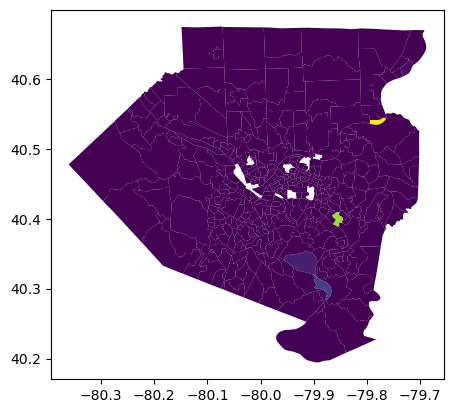

In [403]:
AlCo2016.plot(column='Grand Total')

In [442]:
data.columns.to_list()

['Geo_FIPS',
 'YearOfContactDate',
 'TotalPopEst2015_19ACS_x',
 'Age0to17PopEst2015_19ACS_x',
 'AllPrimaryCarePatientsAge0to17',
 'WellChildVisitsInPastYearAge0to17',
 'AsthmaDiagnosisAge0to17',
 'YearOfStartDate',
 'UnderAge1PopEst2015_19ACS',
 'Unique0to17WithED_Visit',
 'NumberED_VisitsAge0to17',
 'NumberLowAcuityED_VisitsAge0to17',
 'NumberAsthmaRelatedED_Visits',
 'NumberED_VisitsByChildrenUnder1YearOld',
 'NumberOfInjuryRelatedVisits',
 'NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17',
 'Geography',
 'Geographic Area Name_x',
 'Total',
 'Total!!Hispanic or Latino',
 'Total!!Not Hispanic or Latino',
 'Total!!Not Hispanic or Latino!!Population of one race',
 'Total!!Not Hispanic or Latino!!Population of one race!!White alone',
 'Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone',
 'Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone',
 'Total!!Not Hispanic or Latino!!Population of one race

In [483]:
swm = pd.read_excel('SWM.xlsx')
AlCoFull['TractNum'] = AlCoFull['TRACTCE'].astype(int)
swm = AlCoFull[['Grand Total', 'TractNum', 'YearOfContactDate']].merge(swm, how='left', left_on='TractNum', right_on='TRACTINT')
swm['WEIGHTED'] = swm['WEIGHT']*swm['Grand Total']
swm = swm[['NID','WEIGHTED']].groupby('NID').sum()
test = AlCoFull.merge(swm, how ='left', left_on='TractNum', right_on='NID')

test['WEIGHTED_SUM'] = test['WEIGHTED'] + test['Grand Total']

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


<Axes: >

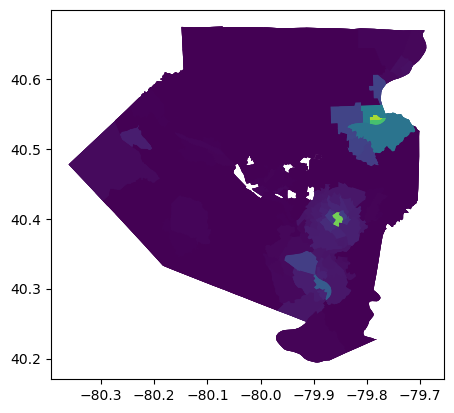

In [485]:
test.plot(column='WEIGHTED_SUM')


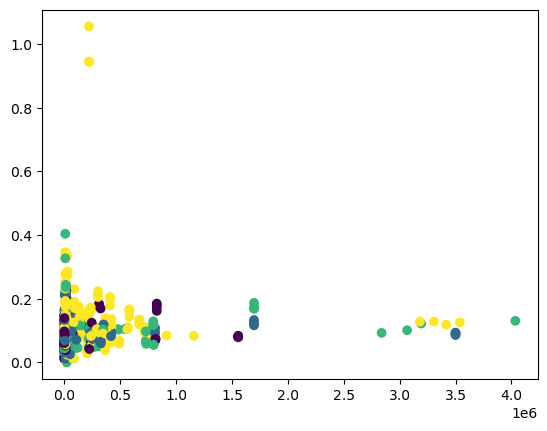

In [487]:
plt.scatter(test['WEIGHTED_SUM'], test['AsthmaDiagnosisAge0to17']/test['Age0to17PopEst2015_19ACS_x'], c=test['High_Prev'])

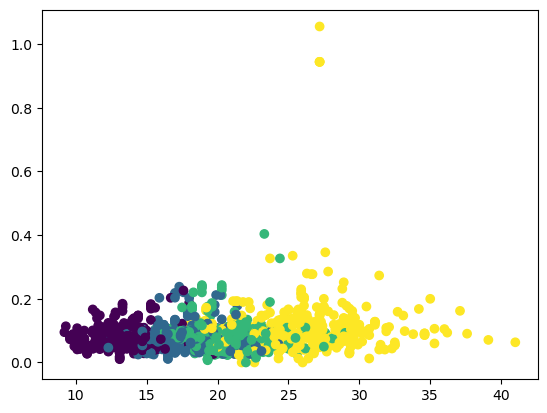

In [413]:
plt.scatter(data['CSMOKING_CrudePrev'], data['AsthmaDiagnosisAge0to17']/data['Age0to17PopEst2015_19ACS_x'], c = data['High_Prev'])

<Axes: >

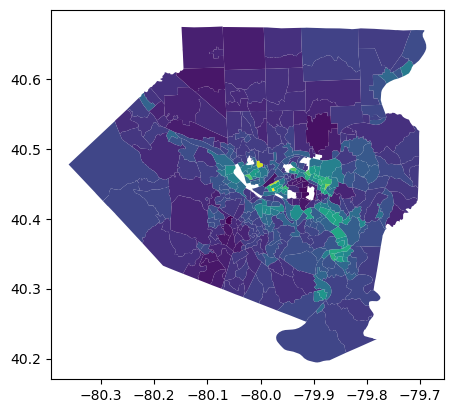

In [415]:
AlCo2016.plot(column='CASTHMA_CrudePrev')

In [426]:
data['AsthmaDiagnosis%'] = data['AsthmaDiagnosisAge0to17']/data['Age0to17PopEst2015_19ACS_x']

In [430]:
data['High_Diagnosis'] = pd.qcut(data['AsthmaDiagnosis%'], q=4, labels=[1,2,3,4])

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [440]:
data[['Geo_FIPS', 'YearOfContactDate', 'CASTHMA_CrudePrev', 'Grand Total', 'High_Diagnosis']]

,Geo_FIPS,YearOfContactDate,CASTHMA_CrudePrev,Grand Total,High_Diagnosis
0,42003010300,2016,11.5,68.8900,2
1,42003020100,2016,10.0,36410.4401,1
2,42003020300,2016,8.3,0.0000,2
3,42003030500,2016,14.0,0.0000,4
4,42003040200,2016,13.0,73625.8502,4
...,...,...,...,...,...
1574,42003564200,2019,9.6,0.0000,2
1575,42003564400,2019,10.1,0.0000,1
1576,42003564500,2019,10.0,37735.8404,3
1583,42003981800,2019,9.2,0.0000,1
